In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("Raw_data.csv")
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [3]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


### feature construction

In [4]:
from datetime import datetime
currentyear=datetime.now().year
df["Rooms"]=df["Num_Bedrooms"]+df["Num_Bathrooms"]
df["Age"]=currentyear-df["Year_Built"]
df.sample(5)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,Rooms,Age
6,3671,1,2,2012,4.911960,0,1,814427.861409,3,13
655,2786,1,2,2015,1.622764,2,9,617979.852975,3,10
275,2395,2,3,1990,2.473055,2,2,534533.020037,5,35
374,3587,2,3,1966,2.848789,0,3,720883.657171,5,59
630,1260,4,2,1965,1.929626,2,9,278644.669337,6,60


In [5]:
## droping Num_Bedrooms, Num_BAthrooms and YEar_Built
df.drop(columns=["Num_Bedrooms","Num_Bathrooms","Year_Built"],inplace=True)

In [6]:
df.sample(5)

,Square_Footage,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,Rooms,Age
687,2103,3.993307,0,10,474659.860055,4,42
64,4298,2.206519,2,3,919295.854062,7,41
269,3827,2.372981,0,1,827143.776402,5,19
40,2541,1.435804,0,8,565562.750432,6,20
157,702,0.525734,1,5,183663.646457,8,54


## Univariate Analysis

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Square_Footage', ylabel='House_Price'>

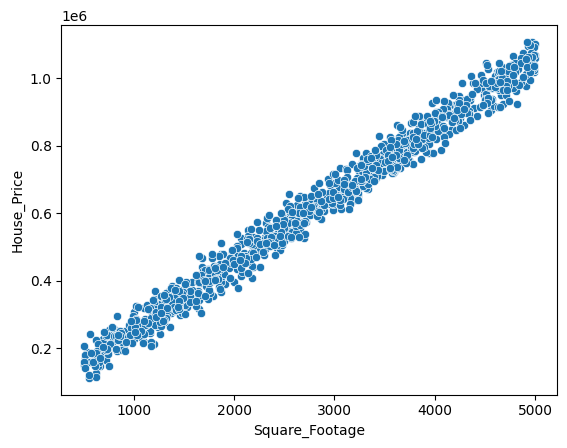

In [8]:
sns.scatterplot(x="Square_Footage",y="House_Price",data=df)

<Axes: xlabel='Lot_Size', ylabel='House_Price'>

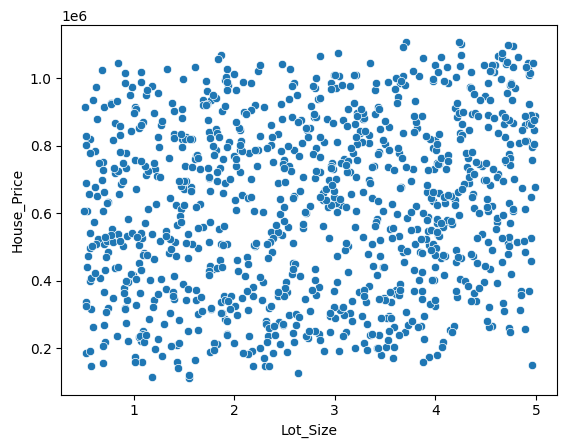

In [9]:
sns.scatterplot(x="Lot_Size",y="House_Price",data=df)

<Axes: xlabel='Rooms', ylabel='House_Price'>

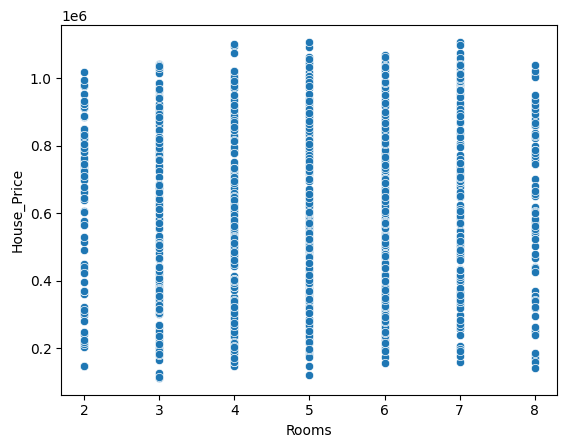

In [10]:
sns.scatterplot(x="Rooms",y="House_Price",data=df)

<Axes: xlabel='Age', ylabel='House_Price'>

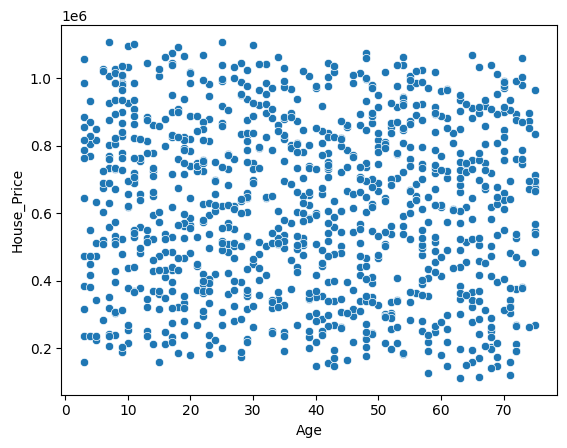

In [11]:
sns.scatterplot(x="Age",y="House_Price",data=df)

<Axes: xlabel='Garage_Size', ylabel='House_Price'>

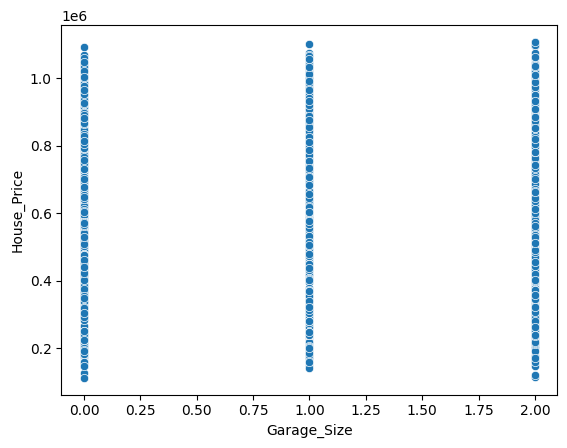

In [12]:
sns.scatterplot(data=df,x="Garage_Size",y="House_Price")

<Axes: xlabel='Neighborhood_Quality', ylabel='House_Price'>

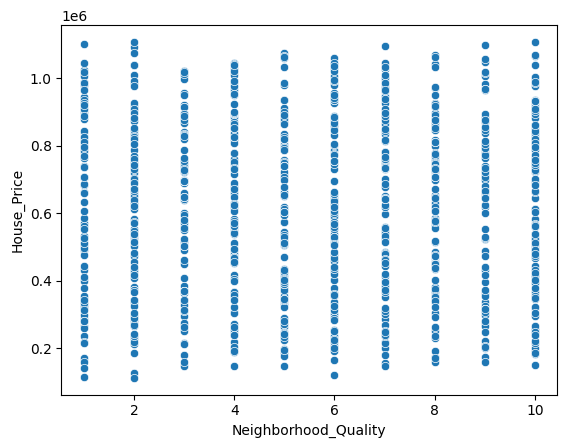

In [13]:
sns.scatterplot(data=df,x="Neighborhood_Quality",y="House_Price")

In [14]:
df.corr()

,Square_Footage,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,Rooms,Age
Square_Footage,1.000000,0.089479,0.030593,-0.008357,0.991261,-0.052987,0.022392
Lot_Size,0.089479,1.000000,0.002436,0.037630,0.160412,0.009198,0.061050
Garage_Size,0.030593,0.002436,1.000000,-0.011287,0.052133,0.109935,0.025485
Neighborhood_Quality,-0.008357,0.037630,-0.011287,1.000000,-0.007770,-0.033417,0.009549
House_Price,0.991261,0.160412,0.052133,-0.007770,1.000000,0.011646,-0.051967
Rooms,-0.052987,0.009198,0.109935,-0.033417,0.011646,1.000000,0.023975
Age,0.022392,0.061050,0.025485,0.009549,-0.051967,0.023975,1.000000


<Axes: >

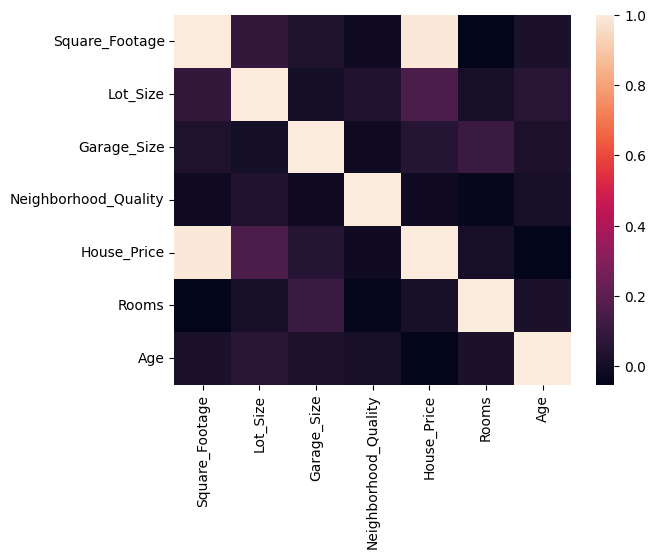

In [15]:
sns.heatmap(df.corr())

<Axes: xlabel='Age', ylabel='Density'>

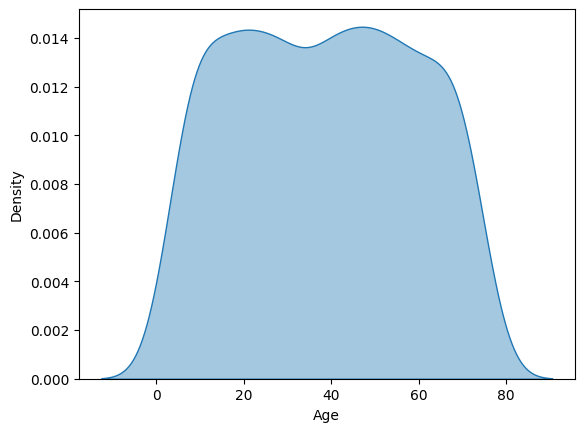

In [16]:
sns.kdeplot(df["Age"], fill=True, alpha=0.4)

### Observations:
- Square_Footage have a strong positive Correlation with house price 
- Neighborhood_Quality do have any strong relation with target column as we will drop that
- the distribution of [Square_Footage, Lot_Size, Age] are normal

## Scaling the data

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
X=df.drop(columns=["House_Price"])
y=df["House_Price"]

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [20]:
st=StandardScaler()
X_train_trans=st.fit_transform(X_train)
X_test_trans=st.transform(X_test)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [22]:
lin_reg = LinearRegression()
dtr = DecisionTreeRegressor(random_state=42)

lin_reg.fit(X_train, y_train)
dtr.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)
y_pred_dtr = dtr.predict(X_test)

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def score(y_test,y_pred,name):
    print(name)
    print("-"*53)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print("="*53)
    print("\n\n")


In [24]:
score(y_test,y_pred_lin,"Linear Regression")
score(y_test,y_pred_lin,"Decision Tree Regressor ")

Linear Regression
-----------------------------------------------------
R² Score: 0.9984
MAE: 8215.2412
MSE: 102718019.6917
RMSE: 10134.9899



Decision Tree Regressor 
-----------------------------------------------------
R² Score: 0.9984
MAE: 8215.2412
MSE: 102718019.6917
RMSE: 10134.9899





#### Lets choose Linear Regressing
but first we will use cross val score

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

pipeline = make_pipeline(StandardScaler(), LinearRegression())

scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

print(f"R² scores across folds: {scores}")
print(f"Mean R²: {scores.mean():.4f}")


R² scores across folds: [0.99839898 0.9984809  0.9984753  0.99841482 0.99856746]
Mean R²: 0.9985
